## Data has already been normalised with all outliers removed. The intent is to build a log regression classification model.

In [199]:
## Import Libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing as pp
from imblearn.over_sampling import SMOTE as smt 

In [334]:
## Import processed data from the processed folder in the project

path = '/Users/james/projects/adsi/group1_nba_career_prediction/data/processed'
df_train = pd.read_csv(path+'/df_train_norm_outlier.csv')
# Get columns names to inform model building 
df_train.columns

Index(['Id', 'GP', 'FG%', '3P Made', '3PA', '3P%', 'FT%', 'BLK', 'AST', 'DREB',
       'FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN',
       'TARGET_5Yrs'],
      dtype='object')

In [153]:
preds = df_train[['GP', '3PA', 'BLK', 'AST', 'DREB','FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN']]
tgt = df_train['TARGET_5Yrs']
print(preds)
print(tgt)

      GP  3PA  BLK       AST      DREB       FTM       REB      OREB  \
0     80  0.3  0.2  1.473613  1.259921  1.259921  1.560491  1.300591   
1     75 -1.0  0.6  0.887904  1.546680  1.338866  1.875777  1.532619   
2     85  1.2  0.2  0.928318  1.216440  0.736806  1.338866  0.843433   
3     63  0.8  0.1  1.216440  1.259921  0.965489  1.442250  0.928318   
4     63  1.4  0.6  0.736806  1.392477  0.584804  1.698499  1.338866   
...   ..  ...  ...       ...       ...       ...       ...       ...   
7995  32 -0.2  0.2  0.793701  1.216440  0.736806  1.238562  0.669433   
7996  54  0.1  0.3  0.464159  1.032280  0.584804  1.259921  1.000000   
7997  85  0.6  0.2  1.503695  1.280579  1.409460  1.458100  1.000000   
7998  39 -0.5  0.3  0.584804  0.843433  0.843433  0.965489  0.736806   
7999  49  2.4 -0.3  1.518294  1.032280  0.928318  1.062659  0.464159   

           FTA       FGM       PTS       FGA       STL       TOV       MIN  
0     1.426043  1.442250  1.983192  1.856636  1.032280  1.

In [154]:
# Split the Data into test and train sets

preds_train, preds_test, tgt_train, tgt_test = train_test_split(preds, tgt, test_size=0.20, random_state=5, stratify=tgt)
preds_train
tgt_test

888     1
6085    1
5607    1
2348    1
4526    1
       ..
4294    1
5000    1
4612    1
4672    1
5392    1
Name: TARGET_5Yrs, Length: 1600, dtype: int64

In [237]:
## Create a scaler for the data 

scaler = pp.StandardScaler().fit(preds_train)
preds_scaled = scaler.transform(preds_train)
preds_scaled

array([[-0.66421003, -1.09416563,  0.35980865, ...,  0.75918561,
        -0.78126502, -1.01640658],
       [ 0.55297109,  0.58330729, -0.12366298, ...,  0.32127878,
        -0.04759224,  0.91964283],
       [ 2.01358843, -0.30476661, -0.12366298, ...,  1.6238734 ,
         2.63660362,  2.38614824],
       ...,
       [-1.02936436,  0.28728266, -0.60713461, ..., -0.91181388,
        -0.04759224, -0.73343523],
       [ 0.30953486, -1.39019026, -0.12366298, ..., -0.21042377,
        -1.00725399, -0.89634344],
       [-0.29905569,  0.78065704, -0.60713461, ...,  0.070274  ,
         0.25279976,  0.48725666]])

In [238]:
## Balance out the TGT set of data using SMOTE from imbalanced-learn

sm = smt(random_state = 22)
preds_train_smt, tgt_train_smt = sm.fit_resample(preds_train, tgt_train)
print(len(tgt_train),len(tgt_train_smt))
print(len(preds_train), len(preds_train_smt))
preds_train_smt, tgt_train_smt

6400 10670
6400 10670


(       GP       3PA       BLK       AST      DREB       FTM       REB  \
 0      52 -0.300000  0.300000  0.965489  0.965489  0.736806  1.144714   
 1      72  1.400000  0.200000  1.320006  1.392477  1.238562  1.503695   
 2      96  0.500000  0.200000  1.473613  1.885204  1.532619  1.930979   
 3      53 -0.500000  0.600000  1.032280  1.032280  0.928318  1.216440   
 4      88 -0.100000  0.400000  1.091393  1.626133  1.698499  1.817121   
 ...    ..       ...       ...       ...       ...       ...       ...   
 10665  70  0.456758  0.249249  0.702614  1.345987  0.982486  1.625323   
 10666  72 -1.013173  0.028942  1.489173  1.300584  1.231516  1.482170   
 10667  55  2.057091  0.168826  1.136601  0.817595  0.809204  0.893221   
 10668  72 -0.490404  0.203199  1.313840  1.183648  1.060494  1.352572   
 10669  52  1.008370 -0.094978  1.355223  1.090403  0.844854  1.258809   
 
            OREB       FTA       FGM       PTS       FGA       STL       TOV  \
 0      0.843433  0.843433  0.

In [226]:
## Create a model and train it

log_mod = LR(max_iter = 10000)
log_mod

LogisticRegression(max_iter=10000)

In [227]:
## Find the best number of iterations for the model using cross validation grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
grid
log_mod_cv=GridSearchCV(log_mod,grid,cv=10)


In [239]:
## Train the model

#fit_log_mod = clf.fit(preds_train_smt, tgt_train_smt)
#fit_log_mod

fit_cv_log_mod = log_mod_cv.fit(preds_train, tgt_train)

/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/james/projects/adsi/adsi/lib/python3.9/site-packages/sklearn/linear_model

In [240]:
print("tuned hpyerparameters :(best parameters) ",fit_cv_log_mod.best_params_)
print("accuracy :",fit_cv_log_mod.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.83421875


In [246]:
## Check the results 

train_acc = fit_cv_log_mod.score(preds_train, tgt_train)
print('The training accuracy for the model is: {}'.format(train_acc*100))

## This is not a great result - it may need more or less features in it

The training accuracy for the model is: 83.390625


In [247]:
## Make predictions on the test set
tgt_preds = fit_cv_log_mod.predict(preds_test)
len(tgt_preds)

1600

In [248]:
## Check the results in the test model 

test_acc = accuracy_score(tgt_test, tgt_preds)
print('The testing accuracy for the model is: {}'.format(test_acc*100))

The testing accuracy for the model is: 83.5625


In [249]:
## Get a classification report

print(classification_report(tgt_test, tgt_preds))

              precision    recall  f1-score   support

           0       0.62      0.03      0.06       266
           1       0.84      1.00      0.91      1334

    accuracy                           0.84      1600
   macro avg       0.73      0.51      0.48      1600
weighted avg       0.80      0.84      0.77      1600



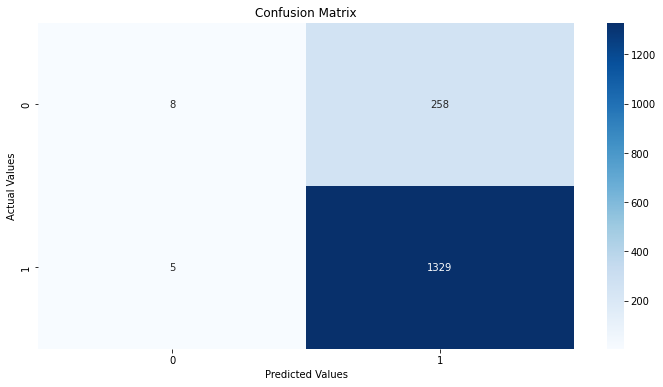

In [250]:
cm=confusion_matrix(tgt_test,tgt_preds)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [251]:
## Import test data set

path = '/Users/james/projects/adsi/group1_nba_career_prediction/data/processed'
df_test = pd.read_csv(path+'/df_test_norm_outlier.csv')
# Get columns names to inform model building 
df_test.columns

Index(['Id', 'GP', 'FG%', '3P Made', '3PA', '3P%', 'FT%', 'BLK', 'AST', 'DREB',
       'FTM', 'REB', 'OREB', 'FTA', 'FGM', 'PTS', 'FGA', 'STL', 'TOV', 'MIN'],
      dtype='object')

In [266]:
pred_lbl = preds.columns
df_test[pred_lbl]

,GP,3PA,BLK,AST,DREB,FTM,REB,OREB,FTA,FGM,PTS,FGA,STL,TOV,MIN
0,56,0.3,0.3,0.736806,0.928318,0.887904,1.193483,1.062659,1.062659,1.169607,1.587401,1.546680,0.584804,0.928318,2.087759
1,43,1.7,-0.0,1.518294,0.965489,1.216440,1.144714,0.793701,1.357209,1.546680,2.161592,2.008299,0.843433,1.216440,2.682373
2,82,1.9,0.3,1.357209,1.488806,1.216440,1.650964,1.091393,1.392477,1.698499,2.244017,2.196689,1.091393,1.259921,3.236433
3,86,1.8,0.1,1.600521,1.473613,1.650964,1.709976,1.144714,1.846915,1.894536,2.659006,2.514581,0.965489,1.532619,3.548971
4,58,1.7,0.2,1.144714,0.843433,1.032280,0.965489,0.584804,1.091393,1.169607,1.675069,1.587401,0.793701,0.965489,2.308350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,-0.0,0.3,1.144714,1.320006,1.193483,1.574061,1.238562,1.357209,1.503695,2.056710,1.885204,0.843433,1.259921,2.767655
3795,49,-0.4,0.4,0.736806,1.409460,1.000000,1.638643,1.193483,1.238562,1.426043,1.856636,1.875777,0.736806,0.887904,2.535494
3796,53,-0.6,0.2,0.736806,1.000000,0.843433,1.193483,0.887904,1.000000,0.928318,1.280579,1.216440,0.736806,0.793701,2.147229
3797,89,1.2,0.3,1.546680,1.587401,1.357209,1.765174,1.144714,1.426043,1.754411,2.438499,2.276638,1.091393,1.338866,3.370800


In [328]:
test_pred_prob_log = fit_cv_log_mod.predict_proba(df_test[pred_lbl])
x = test_pred_prob_log[:,1]
len(x)
len(x)

3799

In [329]:
test_pred_prob = pd.DataFrame(test_pred_prob_log[:,1])
test_pred_prob.columns = ['TARGET_5Yrs']
test_pred_prob

,TARGET_5Yrs
0,0.801511
1,0.750911
2,0.930788
3,0.950057
4,0.767826
...,...
3794,0.936996
3795,0.842460
3796,0.770981
3797,0.953664


In [330]:
Id = pd.DataFrame(df_test['Id'])
Id
test_pred_prob

,TARGET_5Yrs
0,0.801511
1,0.750911
2,0.930788
3,0.950057
4,0.767826
...,...
3794,0.936996
3795,0.842460
3796,0.770981
3797,0.953664


In [331]:
submission = Id.join(test_pred_prob)
submission

,Id,TARGET_5Yrs
0,1,0.801511
1,8194,0.750911
2,3,0.930788
3,8196,0.950057
4,8197,0.767826
...,...,...
3794,8175,0.936996
3795,8176,0.842460
3796,8178,0.770981
3797,8181,0.953664


In [332]:
submission.to_csv('/Users/james/projects/adsi/group1_nba_career_prediction/models/model_4_1.csv', index = False)